## Voronoi Triangles Based on Tracking Data

I have to thanks Laurie from Friends of Tracking so much for his videos and the libraries he created to plot the pitch and handle tracking data. You can find the video I used for the initial part here: https://www.youtube.com/watch?v=8TrleFklEsE&t=12s and I highly recommend his courses if you are interested in getting started with tracking data. You can find the github for his code and the libraries that I used here: https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking

I downloaded Metrica's anonymized tracking data for two games here: https://github.com/metrica-sports/sample-data

In [1]:
# Import Libraries
import Metrica_IO as mio
import Metrica_Viz as mviz
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

# Set the path and game_id
DATADIR = r'C:\Users\paul9977\Documents\Projects\Soccer Analytics\Friends of Tracking\LaurieOnTracking\sample-data-master\data'
game_id=2

# Let's read in the tracking data and then convert it to metric
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

Reading team: home
Reading team: away


In [2]:
# Getting the points of each player's position for the Voronoi Triangle
x_columns = []
y_columns = []
teams = [tracking_home, tracking_away]
for team in teams:
    for x in range(len(team.loc[11647][2:24])):
        if x%2 == 0:
            x_columns.append(team.loc[11647][x+2])
        else:
            y_columns.append(team.loc[11647][x+2])

# Here comes the most ineffience thing ever, but I was experimenting and too lazy to change it...
x_columns.append(5300)
x_columns.append(5300)
x_columns.append(-5300)
x_columns.append(-5300)
y_columns.append(3400)
y_columns.append(-3400)
y_columns.append(3400)
y_columns.append(-3400)
        
ball_x = tracking_home.loc[11647][30]
ball_y = tracking_home.loc[11647][31]

dists = np.vstack(([x_columns], [y_columns])).T
dists

array([[ 3.627744e+01,  1.698640e+00],
       [-1.494600e-01,  1.032784e+01],
       [ 1.052686e+01,  1.436024e+01],
       [ 8.236200e+00, -4.123520e+00],
       [-2.900160e+00, -8.835240e+00],
       [-1.393900e+01,  4.728720e+00],
       [-7.458160e+00,  3.248360e+00],
       [-1.357012e+01, -6.786400e-01],
       [-7.713620e+00, -1.656548e+01],
       [-1.851926e+01,  2.247944e+01],
       [-2.407684e+01, -6.222000e-01],
       [-4.515812e+01,  8.364000e-01],
       [-2.249214e+01, -1.979616e+01],
       [-2.624772e+01, -8.657080e+00],
       [-2.691340e+01,  4.163640e+00],
       [-1.906834e+01,  2.224552e+01],
       [-1.963120e+00, -2.180080e+01],
       [-1.543784e+01,  1.137844e+01],
       [-8.117480e+00, -3.897760e+00],
       [-1.399836e+01,  4.800800e-01],
       [ 3.917760e+00,  2.803980e+01],
       [ 1.822140e+00, -8.568680e+00],
       [ 5.300000e+03,  3.400000e+03],
       [ 5.300000e+03, -3.400000e+03],
       [-5.300000e+03,  3.400000e+03],
       [-5.300000e+03, -3

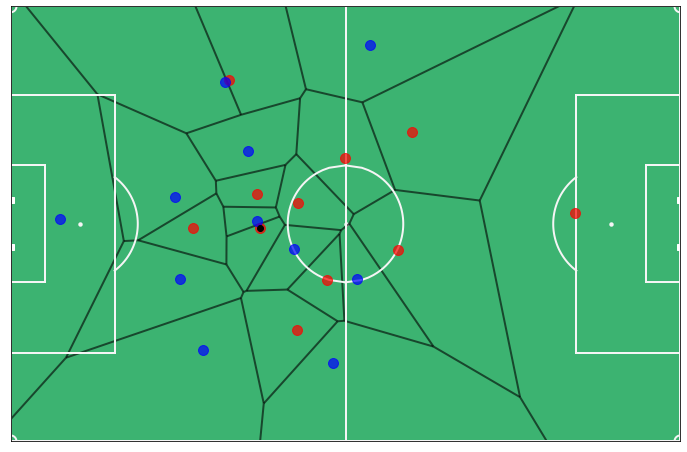

In [3]:
# Plot the player's positions
fig, ax = mviz.plot_frame(tracking_home.loc[11647], tracking_away.loc[11647])

# Create and plot the triangles
vor = Voronoi(dists)
fig = voronoi_plot_2d(vor,show_points=False, show_vertices=False, line_colors='black',
                      line_width=2, line_alpha=0.6, point_size=2, ax=ax)

# Set the limits to the size of a football pitch in meters
ax.set_xlim([-53, 53])
ax.set_ylim([-34, 34])

# Save the picture
#plt.savefig("Voronoi_Triangle.jpg")
plt.show()

Now let's try to add some color to these polygons! Code from: https://github.com/rjtavares/football-crunching/blob/master/notebooks/using%20voronoi%20diagrams.ipynb

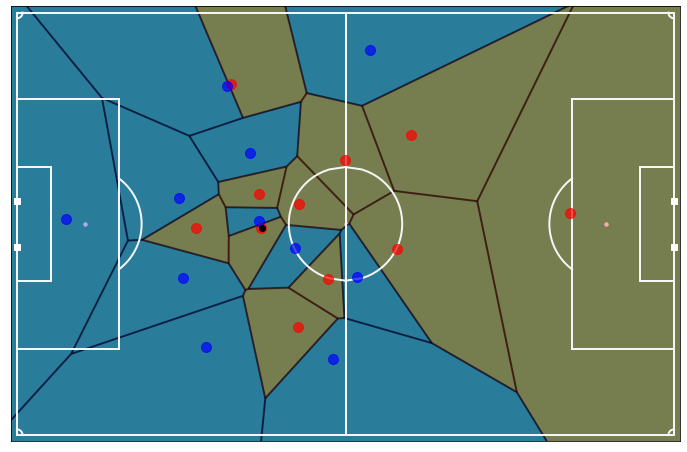

In [4]:
colors = ['red']*11 + ['blue']*11

fig, ax = mviz.plot_frame(tracking_home.loc[11647], tracking_away.loc[11647])
# Create and plot the triangles
vor = Voronoi(dists)
df = pd.DataFrame(colors)
df['region'] = vor.point_region[:-4]
fig = voronoi_plot_2d(vor,show_points=False, show_vertices=False, line_colors='black',
                      line_width=2, line_alpha=0.6, point_size=2, ax=ax)

for index, region in enumerate(vor.regions):
        if not -1 in region:
            if len(region)>0:
                pl = df[df['region']==index]
                polygon = Polygon([vor.vertices[i] for i in region])
                color = pl[0].values[0]
                x, y = polygon.exterior.xy
                plt.fill(x, y, c=color, alpha=0.30)
                
ax.set_xlim(-54,54)
ax.set_ylim(-35, 35)

plt.show()

I then used the cell below to loop through a section of play that led up to a goal and create a frame for each one calculating new Voronoi triangles. I then used ffmpeg in the command line to create a video

In [5]:
# events = range(11647, 12300)
# for y in events:
#     x_columns = []
#     y_columns = []
#     teams = [tracking_home, tracking_away]
#     for team in teams:
#         for x in range(len(team.loc[y][2:24])):
#             if x%2 == 0:
#                 x_columns.append(team.loc[y][x+2])
#             else:
#                 y_columns.append(team.loc[y][x+2])

#     dists = np.vstack(([x_columns], [y_columns])).T
#     dists

#     fig, ax = mviz.plot_frame(tracking_home.loc[y], tracking_away.loc[y])


#     vor = Voronoi(dists)
#     fig = voronoi_plot_2d(vor,show_points=False, show_vertices=False, line_colors='black',
#                       line_width=2, line_alpha=0.6, point_size=2, ax=ax)
#     ax.set_xlim([-53, 53])
#     ax.set_ylim([-34, 34])

#     plt.savefig(f"Voronoi Pics\Voronoi_Triangle{y}.jpg")


# With Colors
# plt.rcParams.update({'figure.max_open_warning': 0})
# events = range(11647, 12299)
# #events = range(11647, 11660)
# for y in events:
#     x_columns = []
#     y_columns = []
#     teams = [tracking_home, tracking_away]
#     for team in teams:
#         for x in range(len(team.loc[y][2:24])):
#             if x%2 == 0:
#                 x_columns.append(team.loc[y][x+2])
#             else:
#                 y_columns.append(team.loc[y][x+2])

#     #Still being lazy... sorry
#     x_columns.append(5300)
#     x_columns.append(5300)
#     x_columns.append(-5300)
#     x_columns.append(-5300)
#     y_columns.append(3400)
#     y_columns.append(-3400)
#     y_columns.append(3400)
#     y_columns.append(-3400)

#     dists = np.vstack(([x_columns], [y_columns])).T
#     dists

#     fig, ax = mviz.plot_frame(tracking_home.loc[y], tracking_away.loc[y])


#     vor = Voronoi(dists)
#     df = pd.DataFrame(colors)
#     df['region'] = vor.point_region[:-4]
#     fig = voronoi_plot_2d(vor,show_points=False, show_vertices=False, line_colors='black',
#                       line_width=2, line_alpha=0.6, point_size=2, ax=ax)
    
#     for index, region in enumerate(vor.regions):
#         if not -1 in region:
#             if len(region)>0:
#                 pl = df[df['region']==index]
#                 polygon = Polygon([vor.vertices[i] for i in region])
#                 if len(pl)>0:
#                     color = pl[0].values[0]
#                 else:
#                     color='black'
#                     print(index)
#                 x, z = polygon.exterior.xy
#                 plt.fill(x, z, c=color, alpha=0.30)
                
#     ax.set_xlim(-54,54)
#     ax.set_ylim(-35, 35)

#     plt.savefig(f'Voronoi Pics with Team Colors\Voronoi_Triangle_with_color_{y}.jpg')

I then run this command in the comand prompt after saving ffmpeg into the folder with the pictures:

ffmpeg -start_number 11647 -i Voronoi_Triangle_with_color_%05d.jpg Voronoi_with_color.avi